# Quantitative behavior of protein complexes 

In this chapter, we will look deeper into the same cancer data set and specifically look into the behavior of proteins known to form complexes. There is increasing consensus that most of these proteins are tightly regulated by selective degradation (see e.g. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5660600/). This leads to  
a) very similar quantitative changes in the expression profiles of the proteins and   
b) many of the observed differences between the transcriptome and proteome

The following analysis will give more insight into the quantitative behavior of protein complexes.

Find some accompanying slides on http://computproteomics.bmb.sdu.dk/BMB842/#21


### Reading the data

We will take the same data from the paper: https://www.ncbi.nlm.nih.gov/pubmed/30962452

Let's manually check some of the complexes also analyzed in the paper.

We will do that in a simplistic way with some lines of R code which, on the other hand, also provide us additional information. 

Fig. 3 in the paper shows patterns of the subunits of the following complexes:

_First example:_ The MCM complex  
👨‍💻Carry out hierarchical clustering (`heatmap`) for proteins that contain "MCM" in their name.

_Second example:_ Condensin I complex  
👨‍💻 Carry out hierarchical clustering (`heatmap`) for proteins that contain "SCM" or "NCA" in their name.

<span style="background-color:#ffdddd;border-left:6px;">You will get more than the proteins known to be subunits of the complex. Check whether the complex subunits show similar changes of their quantitative behavior.</span>

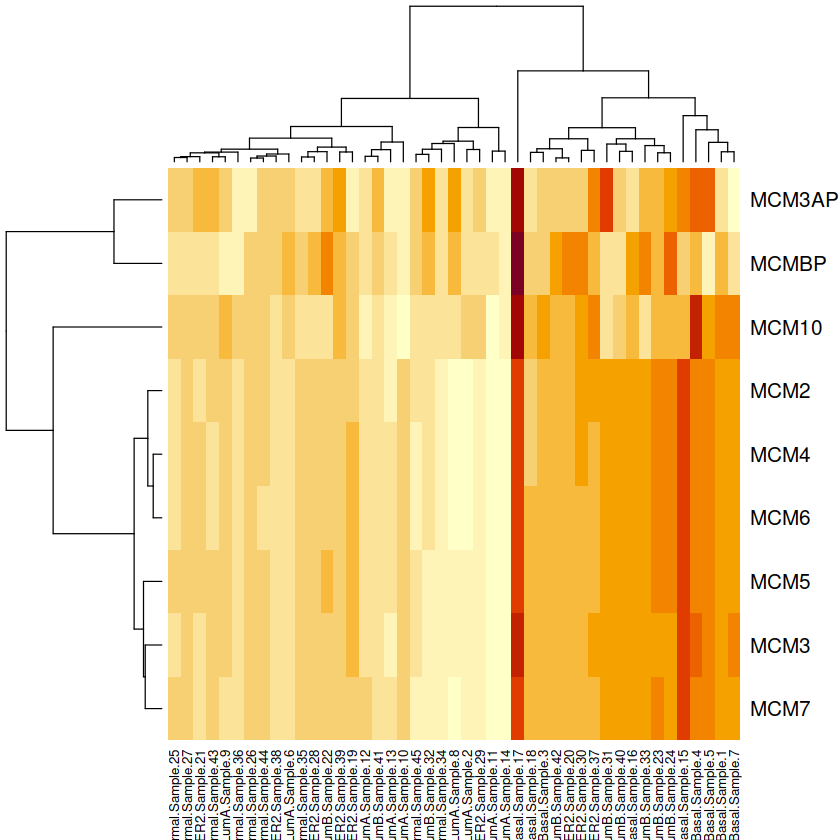

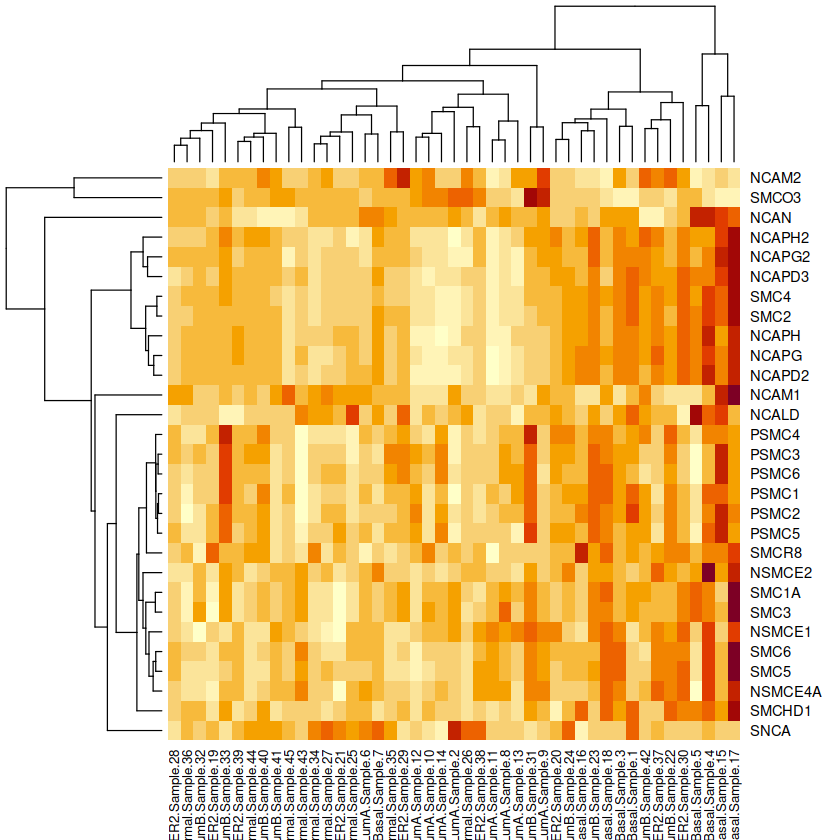

In [9]:
lQuantTable <-read.csv("resources/data/PMC6453966_VSClust_in.csv",row.names=1)

# take all proteins containing "MCM" in their name
MCMComplex <- as.matrix(lQuantTable[grep("MCM",rownames(lQuantTable)),])
# Make a hierarchical clustering with the heatmap command here

CondensinComplex <- as.matrix(lQuantTable[grep("NCA|SMC",rownames(lQuantTable)),])
# Make a hierarchical clustering with the heatmap command here
heatmap(MCMComplex)
heatmap(CondensinComplex)


#### Add your answers here
(double-click here to edit the cell)

##### ❔ Question I:  <ins>How similar is the behavior of the complex subunits? Does their behavior still separate the different cancer subtypes? What happens with the sample "Basal 17"? </ins>

_Answer_

##### ❔ Question II:  <ins>When looking at the plot of Condensin I (and others), do you identify the proteins of another complex? Which one is it?</ins>

_Answer_




### Gene IDs and proteins

In order to continue working on this data set, we need to translate the gene names into protein accession numbers from UniProt as this is the common way to annotate proteins. 

For that, we need to install the packages `clusterProfiler` and `org.Hs.eg.db`.

The procedure has some losses as not all gene names have unique protein accession numbers.

In [ ]:
# needed only once:
#install.packages("BiocManager");library(BiocManager);install(c("clusterProfiler","org.Hs.eg.db"))

library(clusterProfiler)
library(org.Hs.eg.db)
# translating IDs
UniProtAccs <- bitr(rownames(lQuantTable), fromType="SYMBOL", toType="UNIPROT",OrgDb = org.Hs.eg.db)

# Remove all redundant entries
UniProtAccs <- UniProtAccs[!duplicated(UniProtAccs$SYMBOL) ,]
UniProtAccs <- UniProtAccs[!duplicated(UniProtAccs$UNIPROT) ,]
head(UniProtAccs)
dim(UniProtAccs)

# Create new table with uniprot accession names instead of gene names
uQuantTable <- lQuantTable[UniProtAccs$SYMBOL,]
dim(uQuantTable)
rownames(UniProtAccs) <- UniProtAccs$SYMBOL
rownames(uQuantTable) <- UniProtAccs[rownames(uQuantTable),"UNIPROT"]

# Do not forget to change the folder name!
write.csv(uQuantTable,"resources/data/PMC6453966_ComplexBrowser_in.csv")



#### Add your answers here
(double-click here to edit the cell)

##### ❔ Question I:  <ins>How many genes have been lost in the translation? Can this be avoided?</ins>

_Answer_

##### ❔ Question II:  <ins>What is the difference between reviewed and unreviewed proteins in UniProt? What are the implications when searching mass spectra only for reviewed proteins?</ins>

_Answer_

##### ❔ Question III:  <ins>What is more important: Bacalhao or UniProt?</ins>

_Answer_



### Using ComplexBrowser and CoExpresso

These shiny apps allow interactively investigating protein complexes, or, if desired, the co-regulatory behavior of any protein group. 

_ComplexBrowser_ takes a csv-file and runs some basic quality control on the quantitative data. The second stage of the analysis includes summarization of protein changes to describe the quantitative behavior of entire protein complexes. For that, we use the factor analysis for weighted averaging, see also https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5417831/ and https://www.ncbi.nlm.nih.gov/pubmed/16473874

👨‍💻 Take a look at the tutorial in https://bitbucket.org/michalakw/complexbrowser before launching the program.

You can run ComplexBrowser the same way as VSClust:

a) Download the docker image `docker pull veitveit/complexbrowser` and run  it using `docker run -p3838:3838 veitveit/complexbrowser`. You can access the app via localhost:3838 in your browser afterwards

or 

b) Run it on the server (here we have a max. of 1 person a time): http://computproteomics.bmb.sdu.dk/Apps/ComplexBrowser

_CoExpresso_ is a more light-weight program that is based on the data in ProteomicsDB (proteomicsdb.org), and with that data from 150 different human cell types and tissues. It calculates evidence for statistically significant co-regulation of a set protein within all cell types where these proteins are co-expressed. With this, we can compare the general behavior of a protein group (i.e. a protein complex in our case) to the one observed within our cancer subtypes.

👨‍💻 Your task now is to load the saved file into ComplexBrowser and carry out some basic supervised analysis with respect to protein complexes defined in [CORUM](https://mips.helmholtz-muenchen.de/corum/) or [Complex Portal](https://www.ebi.ac.uk/complexportal/).

When choosing a protein complex in ComplexBrowser, you can submit this protein group to CoExpresso to see the group's behavior in human cells.




#### Add your answers here
(double-click here to edit the cell)

##### ❔ Question I:  <ins>Which are the most changing complexes when comparing the first 2 cancer subtypes?</ins>

_Answer_

##### ❔ Question II:  <ins>Take some of these complexes and assess their behavior in the cancer subtypes to the one in human cell types (use CoExpresso). Do you see any differences that might be specific to breast cancer subtypes?</ins>

_Answer_

##### ❔ Question III:  <ins>How is the complex fold-change calculated?</ins>

_Answer_

##### ❔ Question VI:  <ins>Look into the CoExpresso paper. Which are the different randomizations to generate empirical distributions? What does distinguish them?</ins>

_Answer_

